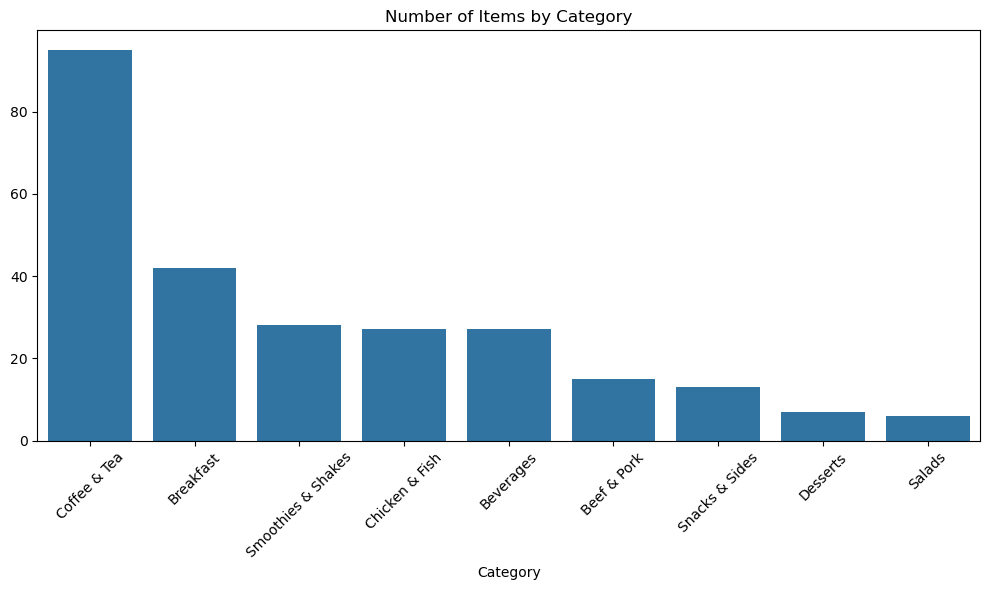

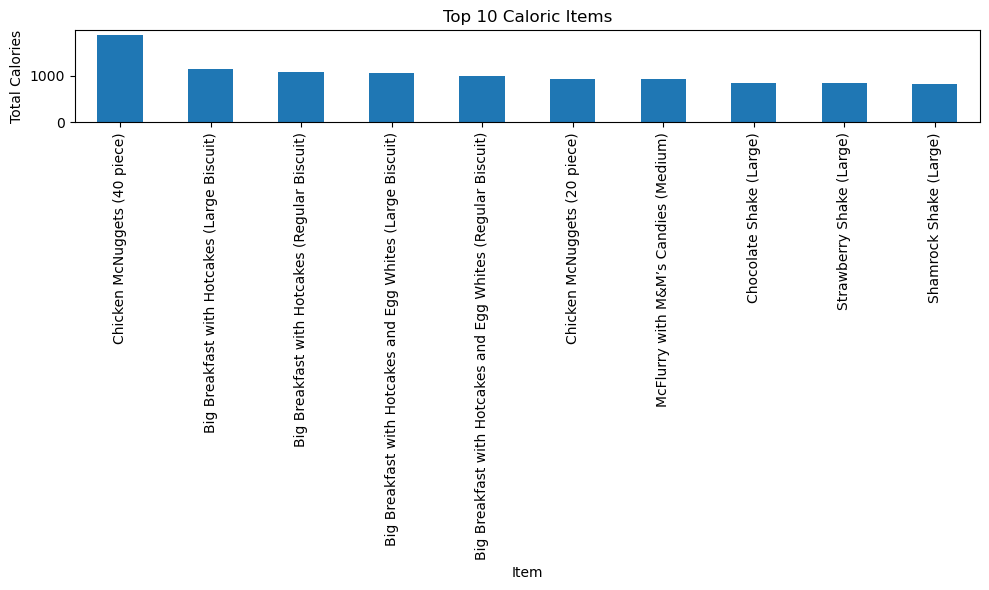

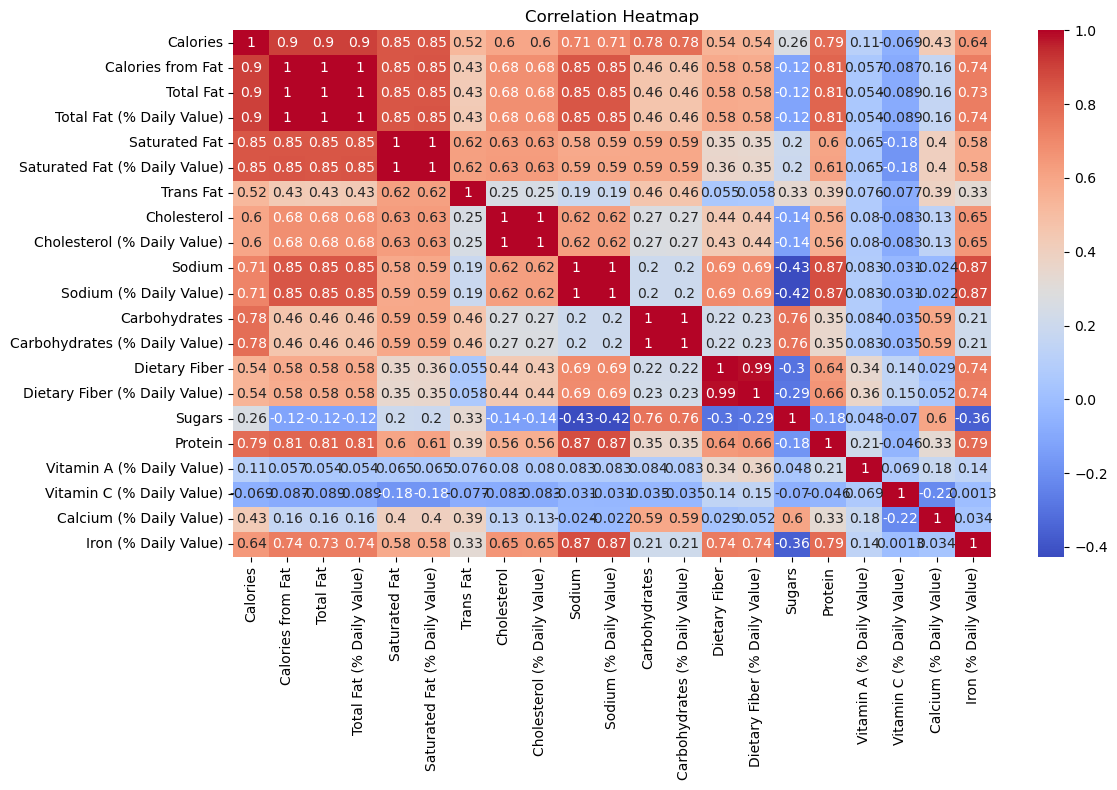

(Calories                         368.269231
 Calories from Fat                127.096154
 Total Fat                         14.165385
 Total Fat (% Daily Value)         21.815385
 Saturated Fat                      6.007692
 Saturated Fat (% Daily Value)     29.965385
 Trans Fat                          0.203846
 Cholesterol                       54.942308
 Cholesterol (% Daily Value)       18.392308
 Sodium                           495.750000
 Sodium (% Daily Value)            20.676923
 Carbohydrates                     47.346154
 Carbohydrates (% Daily Value)     15.780769
 Dietary Fiber                      1.630769
 Dietary Fiber (% Daily Value)      6.530769
 Sugars                            29.423077
 Protein                           13.338462
 Vitamin A (% Daily Value)         13.426923
 Vitamin C (% Daily Value)          8.534615
 Calcium (% Daily Value)           20.973077
 Iron (% Daily Value)               7.734615
 dtype: float64,
 Calories                         340.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("menu.csv")

mean_values = df.select_dtypes(include=np.number).mean()
median_values = df.select_dtypes(include=np.number).median()
mode_values = df.select_dtypes(include=np.number).mode().iloc[0]
std_values = df.select_dtypes(include=np.number).std()

category_counts = df['Category'].value_counts()
top_items = df.groupby('Item')['Calories'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Items by Category')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
top_items.plot(kind='bar')
plt.title('Top 10 Caloric Items')
plt.ylabel('Total Calories')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

mean_values, median_values, mode_values, std_values


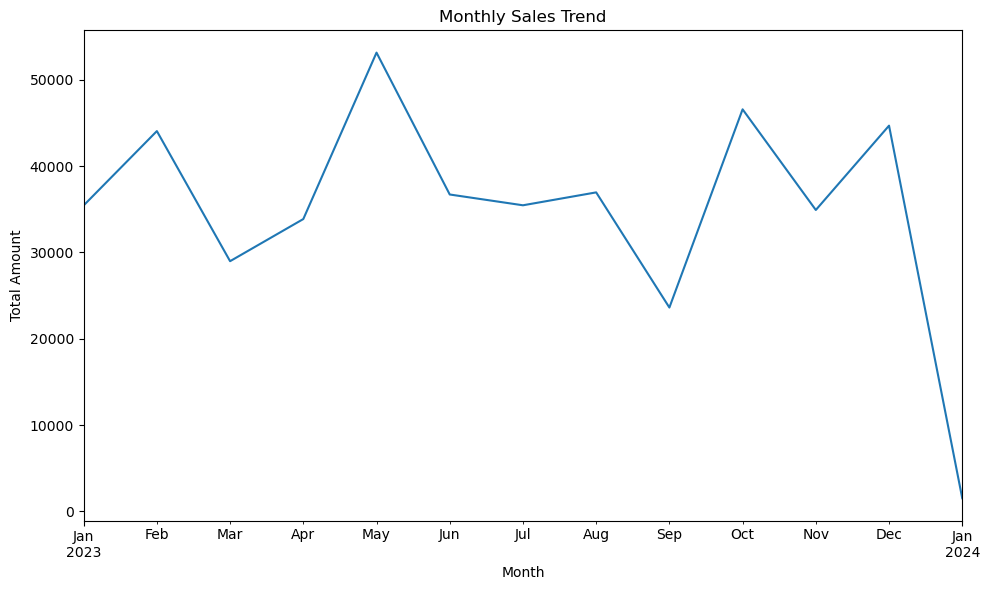

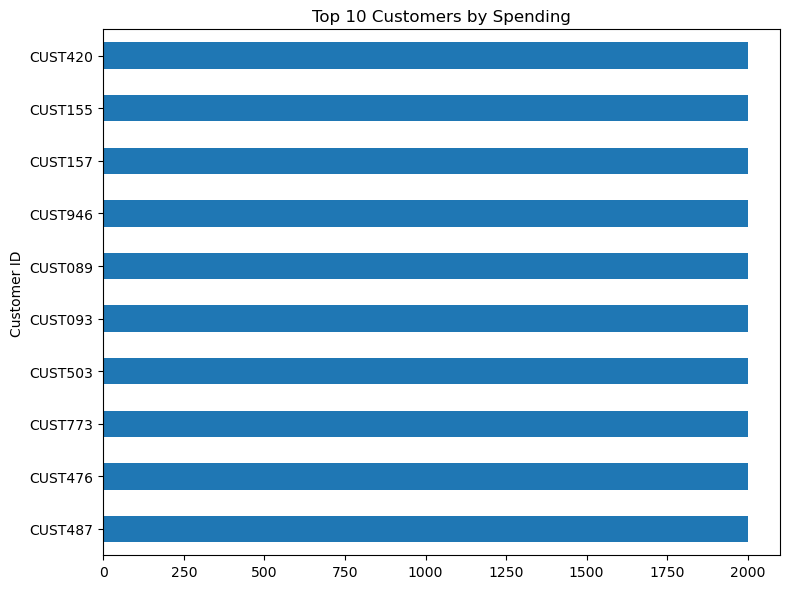

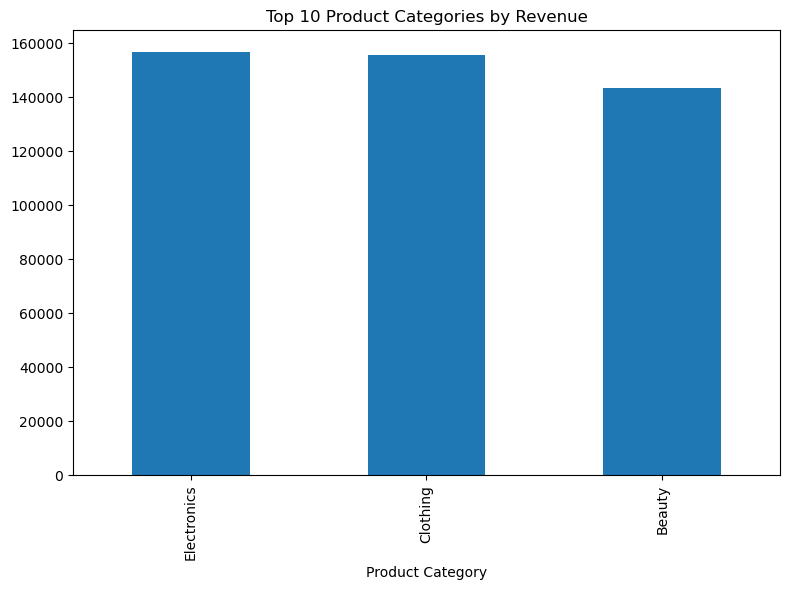

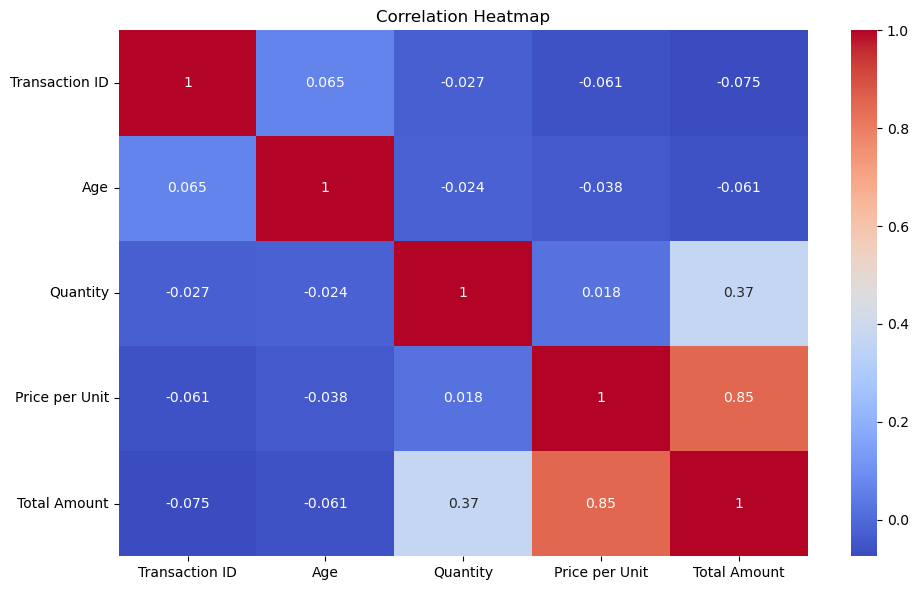

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('retail_sales_dataset.csv')
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_sales = df.resample('ME').sum(numeric_only=True)

customer_analysis = df.groupby('Customer ID').agg({'Total Amount': 'sum', 'Quantity': 'sum'}).sort_values(by='Total Amount', ascending=False)
product_analysis = df.groupby('Product Category').agg({'Total Amount': 'sum', 'Quantity': 'sum'}).sort_values(by='Total Amount', ascending=False)

plt.figure(figsize=(10,6))
monthly_sales['Total Amount'].plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

top_customers = customer_analysis.head(10)
top_customers['Total Amount'].plot(kind='barh', title='Top 10 Customers by Spending', figsize=(8,6))
plt.tight_layout()
plt.show()

top_products = product_analysis.head(10)
top_products['Total Amount'].plot(kind='bar', title='Top 10 Product Categories by Revenue', figsize=(8,6))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


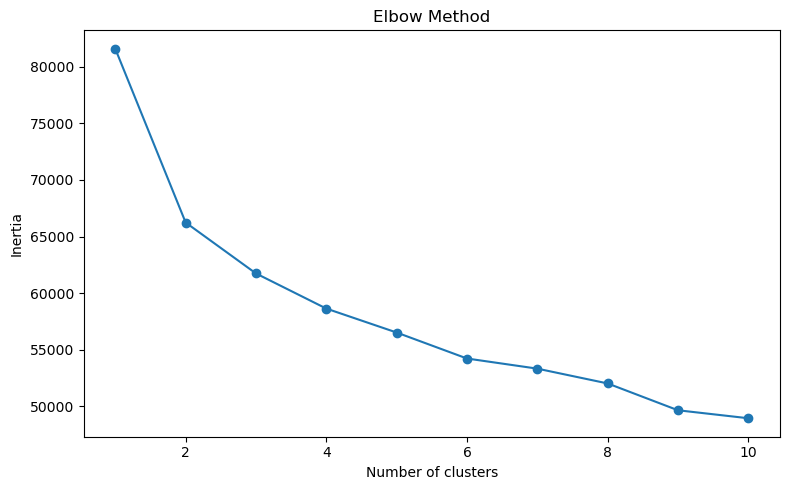

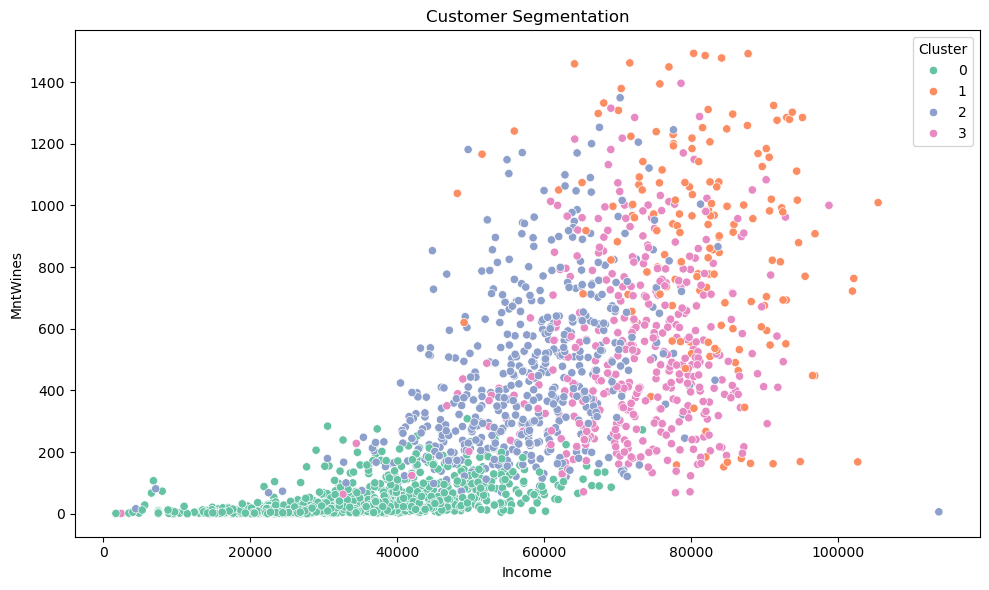

Cluster
0    1032
2     565
3     433
1     175
Name: count, dtype: int64
Income                  51622.094785
Kidhome                     0.442177
Teenhome                    0.506576
Recency                    49.009070
MntWines                  306.164626
MntFruits                  26.403175
MntMeatProducts           165.312018
MntFishProducts            37.756463
MntSweetProducts           27.128345
MntGoldProds               44.057143
NumDealsPurchases           2.318367
NumWebPurchases             4.100680
NumCatalogPurchases         2.645351
NumStorePurchases           5.823583
NumWebVisitsMonth           5.336961
AcceptedCmp3                0.073923
AcceptedCmp4                0.074376
AcceptedCmp5                0.073016
AcceptedCmp1                0.064399
AcceptedCmp2                0.013605
Complain                    0.009070
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.151020
Age                        51.095692
C

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ifood_df.csv")

df = df.dropna()
df_numeric = df.select_dtypes(include=np.number)

mean_values = df_numeric.mean()
median_values = df_numeric.median()
mode_values = df_numeric.mode().iloc[0]
std_values = df_numeric.std()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation')
plt.tight_layout()
plt.show()

print(df['Cluster'].value_counts())
print(mean_values)
print(median_values)
print(mode_values)
print(std_values)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("AB_NYC_2019.csv")

df = df.drop_duplicates()
df = df.dropna(subset=['name', 'host_name', 'last_review'])

for col in ['reviews_per_month', 'name', 'host_name']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.lower()
    else:
        df[col] = df[col].fillna(0)

numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]

for col in ['price']:
    df[col] = df[col].apply(lambda x: np.round(x, 2))

df.reset_index(drop=True, inplace=True)

print(df.head())


     id                                              name  host_id host_name  \
0  2539                clean & quiet apt home by the park     2787      john   
1  2595                             skylit midtown castle     2845  jennifer   
2  5022  entire apt: spacious studio/loft by central park     7192     laura   
3  5099         large cozy 1 br apartment in midtown east     7322     chris   
4  5121                                   blissartsspace!     7356     garon   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn          Kensington  40.64749  -73.97237   
1           Manhattan             Midtown  40.75362  -73.98377   
2           Manhattan         East Harlem  40.79851  -73.94399   
3           Manhattan         Murray Hill  40.74767  -73.97500   
4            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1     

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("CAvideos.csv")

df = df.drop_duplicates()
df = df.dropna()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]

df.reset_index(drop=True, inplace=True)

print(df.head())


      video_id trending_date  \
0  0dbikq4mz1m      17.14.11   
1  5qpjk5dgct4      17.14.11   
2  d380med0w0m      17.14.11   
3  0yiwz1xeeyc      17.14.11   
4  _um5kffkhb8      17.14.11   

                                               title channel_title  \
0                      plush - bad unboxing fan mail     idubbbztv   
1  racist superman | rudy mancuso, king bach & le...  rudy mancuso   
2                           i dare you: going bald!?      nigahiga   
3  jake paul says alissa violet cheated with loga...    dramaalert   
4             vanoss superhero school - new students  vanossgaming   

   category_id              publish_time  \
0           23  2017-11-13t17:00:00.000z   
1           23  2017-11-12t19:05:24.000z   
2           24  2017-11-12t18:01:41.000z   
3           25  2017-11-13t07:37:51.000z   
4           23  2017-11-12t23:52:13.000z   

                                                tags    views   likes  \
0  plush|"bad unboxing"|"unboxing"|"fan mail"|"i

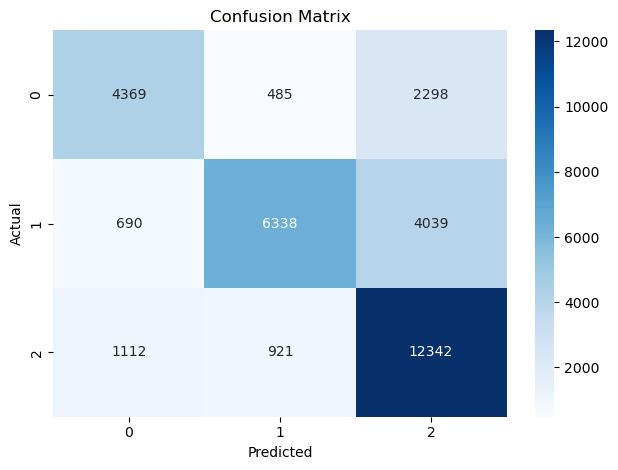

              precision    recall  f1-score   support

        -1.0       0.71      0.61      0.66      7152
         0.0       0.82      0.57      0.67     11067
         1.0       0.66      0.86      0.75     14375

    accuracy                           0.71     32594
   macro avg       0.73      0.68      0.69     32594
weighted avg       0.72      0.71      0.70     32594



In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Twitter_Data.csv")

df = df.dropna()
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred))


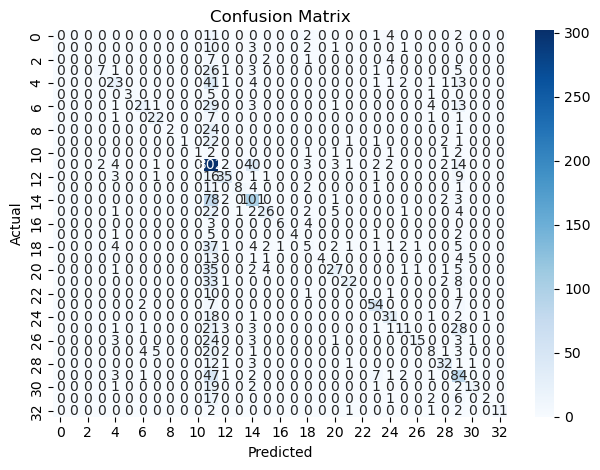

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        20
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        14
BOOKS_AND_REFERENCE       0.78      0.16      0.26        44
           BUSINESS       0.48      0.26      0.34        88
             COMICS       1.00      0.33      0.50         9
      COMMUNICATION       0.72      0.29      0.41        73
             DATING       0.73      0.69      0.71        32
          EDUCATION       1.00      0.07      0.14        27
      ENTERTAINMENT       1.00      0.04      0.07        28
             EVENTS       1.00      0.11      0.20         9
             FAMILY       0.32      0.80      0.46       378
            FINANCE       0.70      0.52      0.60        67
     FOOD_AND_DRINK       0.89      0.30      0.44        27
               GAME       0.55      0.54      0.55       187
 HEALTH_AND_FITNESS    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("apps.csv")
df = df[['App', 'Category']].dropna()
df['App'] = df['App'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['App'])
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred))
